### 假设检验
- 原假设/零假设（Null hypothesis） 斜率为0；H0：一般是希望拒绝的假设。
- 备择假设/替换假设（Alternative hypothesis）斜率不为0；H1：原假设的对立假设。
- α错误/弃真错误：H0为真却被我们拒绝了；这样的概率为α。
- β错误/取伪错误：H1为假却被我们接受了；这样的概率为β。
- 降低犯错的概率提高样本量是方法之一。



假设检验是一种统计方法，用于评估样本数据是否支持特定假设。假设检验的步骤可以分为以下几个关键阶段：

### 假设检验的步骤

1. **提出假设**：
   - **原假设（Null Hypothesis，$H_0$）**：假设某参数（如均值差异、斜率等）等于零。
   - **备择假设（Alternative Hypothesis，$H_A$）**：假设某参数不等于零（可能大于或小于零）。


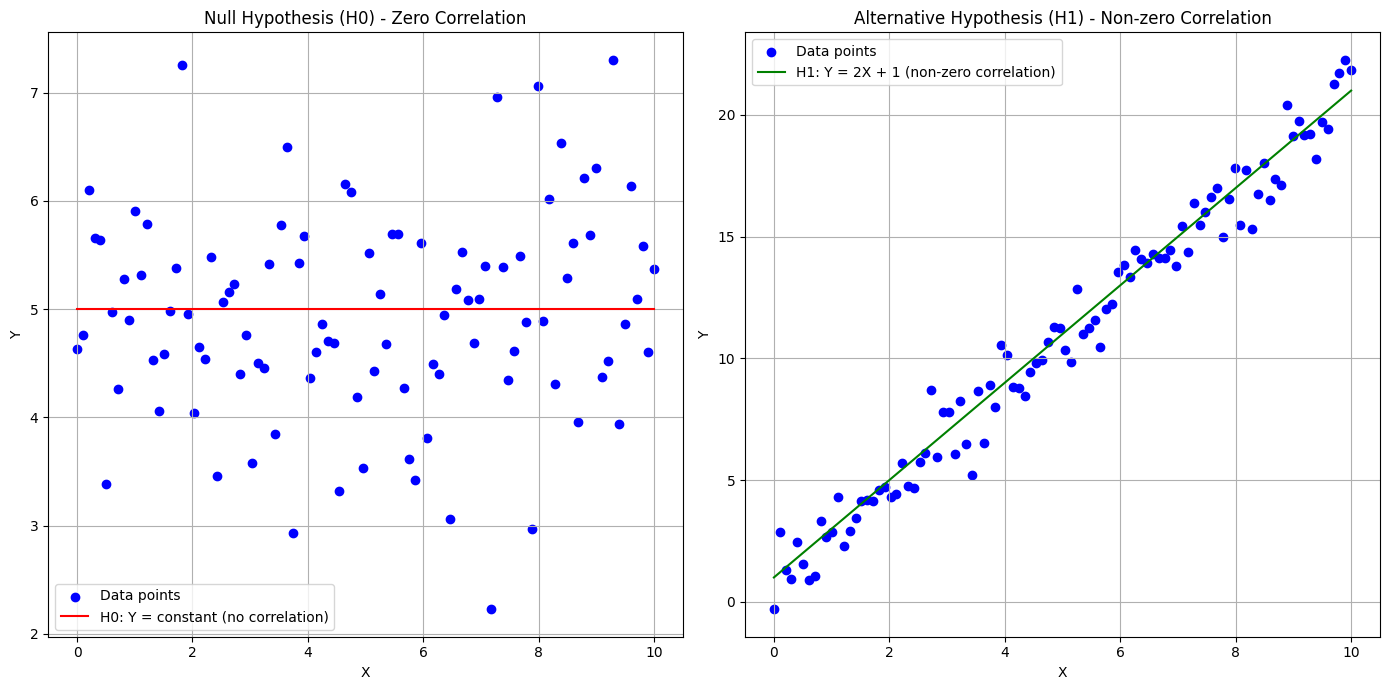

In [2]:
# Generate sample data for null hypothesis with zero correlation
Y_null_hypothesis_zero_corr = np.random.normal(5, 1, X.shape)  # Under H0, Y is random noise

# Generate sample data for alternative hypothesis with non-zero correlation
Y_alternative_hypothesis_non_zero_corr = 2 * X + 1 + np.random.normal(0, 1, X.shape)  # Under H1, slope = 2, intercept = 1

# Plotting the data
plt.figure(figsize=(14, 7))

# Plot for null hypothesis (H0) - zero correlation
plt.subplot(1, 2, 1)
plt.scatter(X, Y_null_hypothesis_zero_corr, color='blue', label='Data points')
plt.plot(X, np.full_like(X, 5), color='red', label='H0: Y = constant (no correlation)')
plt.title('Null Hypothesis (H0) - Zero Correlation')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)

# Plot for alternative hypothesis (H1) - non-zero correlation
plt.subplot(1, 2, 2)
plt.scatter(X, Y_alternative_hypothesis_non_zero_corr, color='blue', label='Data points')
plt.plot(X, 2 * X + 1, color='green', label='H1: Y = 2X + 1 (non-zero correlation)')
plt.title('Alternative Hypothesis (H1) - Non-zero Correlation')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


---


2. **选择适当的检验方法**：
   - 根据研究问题、数据类型和样本量选择合适的统计检验方法（如T检验、Z检验、卡方检验等）。




| 检验类型 | 适用场景 | 假设 | 统计量公式 | 自由度 | 应用 |
|----------|----------|------|------------|--------|------|
| t 检验   | 样本量小 (n < 30)，样本方差未知 | $ H_0: \mu_1 = \mu_2 $ | $ t = \frac{\bar{X} - \mu}{s / \sqrt{n}} $ | $ n - 1 $ | 单样本 t 检验、双样本 t 检验、配对样本 t 检验 |
| z 检验   | 样本量大 (n > 30) 或样本方差已知 | $ H_0: \mu_1 = \mu_2 $ | $ z = \frac{\bar{X} - \mu}{\sigma / \sqrt{n}} $ | 无 | 单样本 z 检验、双样本 z 检验 |
| F 检验   | 比较多个样本的方差或均值 | $ H_0: \sigma_1^2 = \sigma_2^2 $ 或 $ H_0: \mu_1 = \mu_2 = \cdots = \mu_k $ | $ F = \frac{S_1^2}{S_2^2} $ 或 $ F = \frac{MS_{between}}{MS_{within}} $ | $ (k - 1, N - k) $ | 方差分析 (ANOVA)、回归分析 |
| 卡方检验 | 类别数据，独立性检验或拟合优度检验 | $ H_0: 变量独立 $ 或 $ H_0: 观测频率与期望频率一致 $ | $ \chi^2 = \sum \frac{(O_i - E_i)^2}{E_i} $ | $ (r - 1)(c - 1) $ 或 $ n - 1 $ | 独立性检验、拟合优度检验 |


---


3. **确定显著性水平（Significance Level，$\alpha$）**：
   - 通常选择0.05或0.01作为显著性水平，表示在95%或99%的置信水平下检验假设。

4. **收集数据和计算检验统计量**：
   - 根据样本数据计算检验统计量（如T值、Z值、卡方值等）。

5. **计算P值或查找临界值**：
   - **P值**：计算得到的检验统计量对应的P值。
   - **临界值**：根据显著性水平和检验类型查找相应的临界值。

6. **作出决策**：
   - 比较P值与显著性水平$\alpha$：
     - 如果$P \leq \alpha$，拒绝原假设$H_0$。
     - 如果$P > \alpha$，不拒绝原假设$H_0$。
   - 或者比较检验统计量与临界值：
     - 如果检验统计量超过临界值，拒绝原假设$H_0$。
     - 如果检验统计量不超过临界值，不拒绝原假设$H_0$。

7. **结论和解释**：
   - 根据决策结果得出结论，并解释结论的意义和实际应用。

---

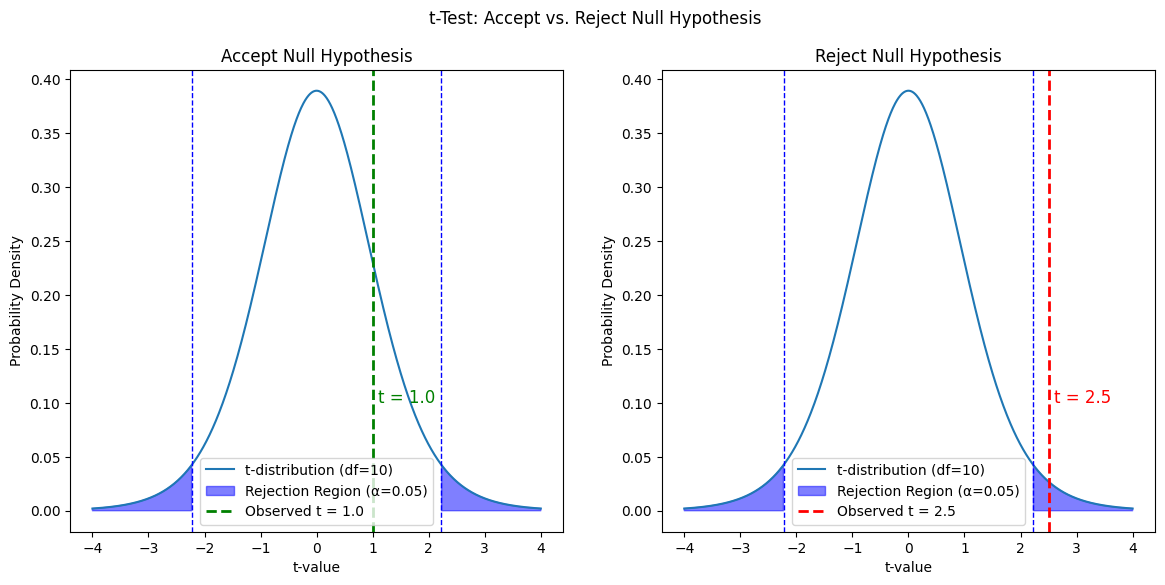

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# 设置参数
df = 10  # 自由度
alpha = 0.05  # 显著性水平

# 生成 t 分布数据
x = np.linspace(-4, 4, 1000)
y = t.pdf(x, df)

# 计算临界值
t_critical = t.ppf(1 - alpha/2, df)

# 创建图表
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# 被接受的情况
t_value_accepted = 1.0  # 示例值，未落入拒绝域

axs[0].plot(x, y, label=f't-distribution (df={df})')
axs[0].fill_between(x, y, where=(x <= -t_critical) | (x >= t_critical), color='blue', alpha=0.5, label='Rejection Region (α=0.05)')
axs[0].axvline(-t_critical, color='blue', linestyle='dashed', linewidth=1)
axs[0].axvline(t_critical, color='blue', linestyle='dashed', linewidth=1)
axs[0].axvline(t_value_accepted, color='green', linestyle='dashed', linewidth=2, label=f'Observed t = {t_value_accepted}')
axs[0].text(t_value_accepted + 0.1, 0.1, f't = {t_value_accepted}', fontsize=12, color='green')
axs[0].set_title('Accept Null Hypothesis')
axs[0].set_xlabel('t-value')
axs[0].set_ylabel('Probability Density')
axs[0].legend()

# 被拒绝的情况
t_value_rejected = 2.5  # 示例值，落入拒绝域

axs[1].plot(x, y, label=f't-distribution (df={df})')
axs[1].fill_between(x, y, where=(x <= -t_critical) | (x >= t_critical), color='blue', alpha=0.5, label='Rejection Region (α=0.05)')
axs[1].axvline(-t_critical, color='blue', linestyle='dashed', linewidth=1)
axs[1].axvline(t_critical, color='blue', linestyle='dashed', linewidth=1)
axs[1].axvline(t_value_rejected, color='red', linestyle='dashed', linewidth=2, label=f'Observed t = {t_value_rejected}')
axs[1].text(t_value_rejected + 0.1, 0.1, f't = {t_value_rejected}', fontsize=12, color='red')
axs[1].set_title('Reject Null Hypothesis')
axs[1].set_xlabel('t-value')
axs[1].set_ylabel('Probability Density')
axs[1].legend()

plt.suptitle('t-Test: Accept vs. Reject Null Hypothesis')
plt.show()


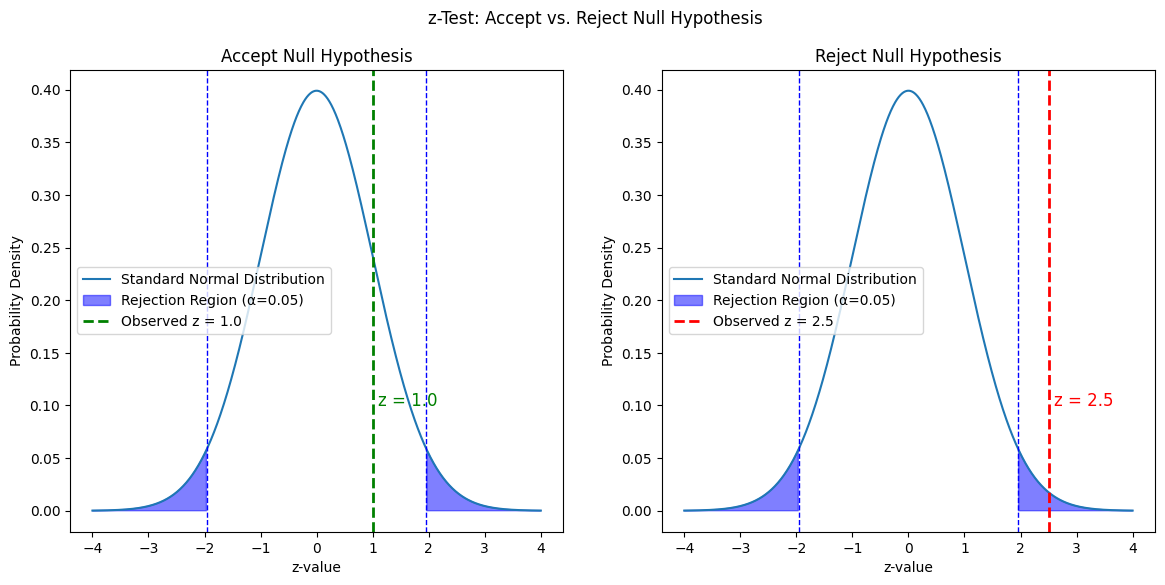

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 设置参数
mu = 0
sigma = 1
alpha = 0.05

# 生成标准正态分布数据
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = norm.pdf(x, mu, sigma)

# 计算临界值
z_critical = norm.ppf(1 - alpha/2)

# 创建图表
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# 被接受的情况
z_value_accepted = 1.0  # 示例值，未落入拒绝域

axs[0].plot(x, y, label='Standard Normal Distribution')
axs[0].fill_between(x, y, where=(x <= -z_critical) | (x >= z_critical), color='blue', alpha=0.5, label='Rejection Region (α=0.05)')
axs[0].axvline(-z_critical, color='blue', linestyle='dashed', linewidth=1)
axs[0].axvline(z_critical, color='blue', linestyle='dashed', linewidth=1)
axs[0].axvline(z_value_accepted, color='green', linestyle='dashed', linewidth=2, label=f'Observed z = {z_value_accepted}')
axs[0].text(z_value_accepted + 0.1, 0.1, f'z = {z_value_accepted}', fontsize=12, color='green')
axs[0].set_title('Accept Null Hypothesis')
axs[0].set_xlabel('z-value')
axs[0].set_ylabel('Probability Density')
axs[0].legend()

# 被拒绝的情况
z_value_rejected = 2.5  # 示例值，落入拒绝域

axs[1].plot(x, y, label='Standard Normal Distribution')
axs[1].fill_between(x, y, where=(x <= -z_critical) | (x >= z_critical), color='blue', alpha=0.5, label='Rejection Region (α=0.05)')
axs[1].axvline(-z_critical, color='blue', linestyle='dashed', linewidth=1)
axs[1].axvline(z_critical, color='blue', linestyle='dashed', linewidth=1)
axs[1].axvline(z_value_rejected, color='red', linestyle='dashed', linewidth=2, label=f'Observed z = {z_value_rejected}')
axs[1].text(z_value_rejected + 0.1, 0.1, f'z = {z_value_rejected}', fontsize=12, color='red')
axs[1].set_title('Reject Null Hypothesis')
axs[1].set_xlabel('z-value')
axs[1].set_ylabel('Probability Density')
axs[1].legend()

plt.suptitle('z-Test: Accept vs. Reject Null Hypothesis')
plt.show()


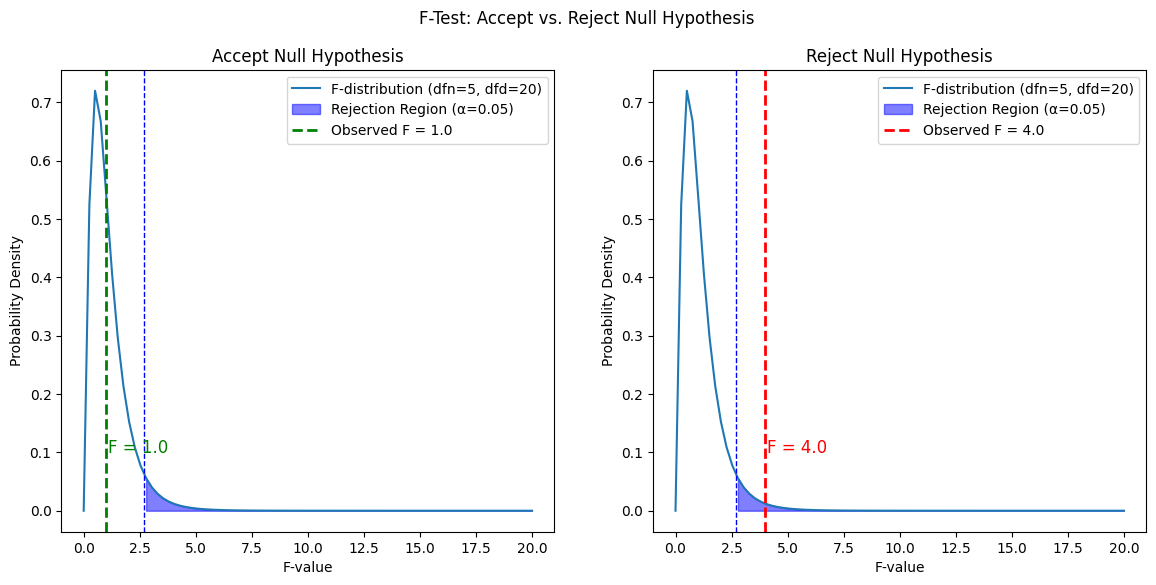

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

# 设置参数
dfn = 5  # 自由度（分子）
dfd = 20  # 自由度（分母）
alpha = 0.05

# 生成 F 分布数据
x = np.linspace(0, 20, 80)
y = f.pdf(x, dfn, dfd)

# 计算临界值
f_critical = f.ppf(1 - alpha, dfn, dfd)

# 创建图表
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# 被接受的情况
f_value_accepted = 1.0  # 示例值，未落入拒绝域

axs[0].plot(x, y, label=f'F-distribution (dfn={dfn}, dfd={dfd})')
axs[0].fill_between(x, y, 0, where=(x >= f_critical), color='blue', alpha=0.5, label='Rejection Region (α=0.05)')
axs[0].axvline(f_critical, color='blue', linestyle='dashed', linewidth=1)
axs[0].axvline(f_value_accepted, color='green', linestyle='dashed', linewidth=2, label=f'Observed F = {f_value_accepted}')
axs[0].text(f_value_accepted + 0.1, 0.1, f'F = {f_value_accepted}', fontsize=12, color='green')
axs[0].set_title('Accept Null Hypothesis')
axs[0].set_xlabel('F-value')
axs[0].set_ylabel('Probability Density')
axs[0].legend()

# 被拒绝的情况
f_value_rejected = 4.0  # 示例值，落入拒绝域

axs[1].plot(x, y, label=f'F-distribution (dfn={dfn}, dfd={dfd})')
axs[1].fill_between(x, y, 0, where=(x >= f_critical), color='blue', alpha=0.5, label='Rejection Region (α=0.05)')
axs[1].axvline(f_critical, color='blue', linestyle='dashed', linewidth=1)
axs[1].axvline(f_value_rejected, color='red', linestyle='dashed', linewidth=2, label=f'Observed F = {f_value_rejected}')
axs[1].text(f_value_rejected + 0.1, 0.1, f'F = {f_value_rejected}', fontsize=12, color='red')
axs[1].set_title('Reject Null Hypothesis')
axs[1].set_xlabel('F-value')
axs[1].set_ylabel('Probability Density')
axs[1].legend()

plt.suptitle('F-Test: Accept vs. Reject Null Hypothesis')
plt.show()


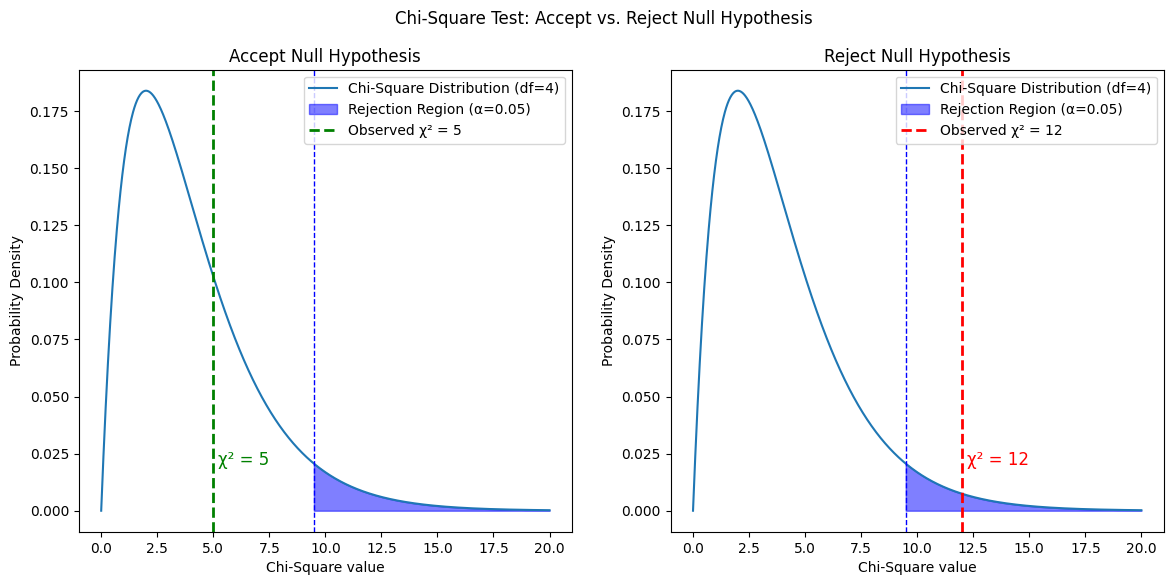

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# 设置参数
df = 4  # 自由度
alpha = 0.05

# 生成卡方分布数据
x = np.linspace(0, 20, 1000)
y = chi2.pdf(x, df)

# 计算临界值
chi2_critical = chi2.ppf(1 - alpha, df)

# 创建图表
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# 被接受的情况
chi2_value_accepted = 5  # 示例值，未落入拒绝域

axs[0].plot(x, y, label=f'Chi-Square Distribution (df={df})')
axs[0].fill_between(x, y, where=(x >= chi2_critical), color='blue', alpha=0.5, label='Rejection Region (α=0.05)')
axs[0].axvline(chi2_critical, color='blue', linestyle='dashed', linewidth=1)
axs[0].axvline(chi2_value_accepted, color='green', linestyle='dashed', linewidth=2, label=f'Observed χ² = {chi2_value_accepted}')
axs[0].text(chi2_value_accepted + 0.2, 0.02, f'χ² = {chi2_value_accepted}', fontsize=12, color='green')
axs[0].set_title('Accept Null Hypothesis')
axs[0].set_xlabel('Chi-Square value')
axs[0].set_ylabel('Probability Density')
axs[0].legend()

# 被拒绝的情况
chi2_value_rejected = 12  # 示例值，落入拒绝域

axs[1].plot(x, y, label=f'Chi-Square Distribution (df={df})')
axs[1].fill_between(x, y, where=(x >= chi2_critical), color='blue', alpha=0.5, label='Rejection Region (α=0.05)')
axs[1].axvline(chi2_critical, color='blue', linestyle='dashed', linewidth=1)
axs[1].axvline(chi2_value_rejected, color='red', linestyle='dashed', linewidth=2, label=f'Observed χ² = {chi2_value_rejected}')
axs[1].text(chi2_value_rejected + 0.2, 0.02, f'χ² = {chi2_value_rejected}', fontsize=12, color='red')
axs[1].set_title('Reject Null Hypothesis')
axs[1].set_xlabel('Chi-Square value')
axs[1].set_ylabel('Probability Density')
axs[1].legend()

plt.suptitle('Chi-Square Test: Accept vs. Reject Null Hypothesis')
plt.show()


---

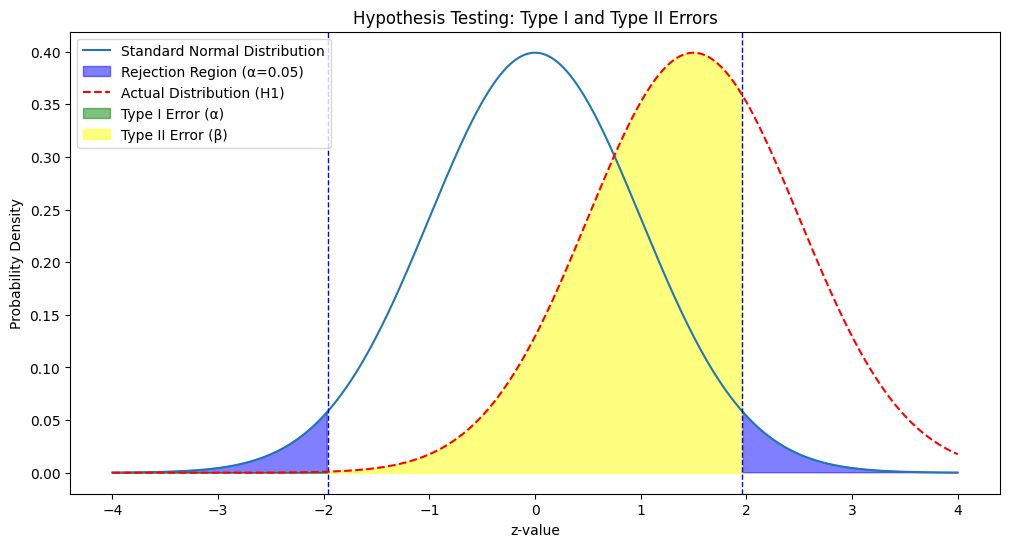

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 设置参数
mu = 0
sigma = 1
alpha = 0.05

# 生成标准正态分布数据
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = norm.pdf(x, mu, sigma)

# 计算临界值
z_critical = norm.ppf(1 - alpha/2)

# 假设检验的实际分布
mu_alt = 1.5  # 实际均值

# 创建图表
fig, ax = plt.subplots(figsize=(12, 6))

# 绘制标准正态分布曲线
ax.plot(x, y, label='Standard Normal Distribution')

# 填充拒绝域
ax.fill_between(x, y, 0, where=(x <= -z_critical) | (x >= z_critical), color='blue', alpha=0.5, label='Rejection Region (α=0.05)')

# 标注拒绝域
ax.axvline(-z_critical, color='blue', linestyle='dashed', linewidth=1)
ax.axvline(z_critical, color='blue', linestyle='dashed', linewidth=1)

# 绘制实际分布
y_alt = norm.pdf(x, mu_alt, sigma)
ax.plot(x, y_alt, label='Actual Distribution (H1)', linestyle='dashed', color='red')

# 填充 α 错误区域
alpha_region_x = np.linspace(mu - 4*sigma, -z_critical, 1000)
alpha_region_y = norm.pdf(alpha_region_x, mu_alt, sigma)
ax.fill_between(alpha_region_x, alpha_region_y, 0, color='green', alpha=0.5, label='Type I Error (α)')

# 填充 β 错误区域
beta_region_x = np.linspace(-z_critical, z_critical, 1000)
beta_region_y = norm.pdf(beta_region_x, mu_alt, sigma)
ax.fill_between(beta_region_x, beta_region_y, 0, color='yellow', alpha=0.5, label='Type II Error (β)')

# 设置标签和标题
ax.set_xlabel('z-value')
ax.set_ylabel('Probability Density')
ax.set_title('Hypothesis Testing: Type I and Type II Errors')
ax.legend()

# 显示图表
plt.show()


在统计假设检验中，错误的发生是不可避免的，这与我们使用样本数据推断总体参数有关。两种常见的错误类型是 α 错误（弃真错误）和 β 错误（取伪错误）。

### α 错误（弃真错误）

#### 生活化例子：药物测试

假设我们在测试一种新药的有效性：

- **原假设$H_0$**：新药无效。
- **备择假设$H_1$**：新药有效。

如果新药实际上无效，但我们的样本数据（例如，几个病人的病情改善）由于随机性误差或样本量不足，导致我们认为新药有效并拒绝了原假设，则发生了 α 错误。

#### 概率

- α 错误的概率由显著性水平 α 决定，通常设定为 0.05 或 0.01。这意味着我们有 5% 或 1% 的概率在原假设为真的情况下，错误地拒绝它。

### β 错误（取伪错误）

#### 生活化例子：质量控制

假设我们在一个生产线上检查产品的质量：

- **原假设$H_0$**：产品合格。
- **备择假设$H_1$**：产品不合格。

如果产品实际上不合格，但我们的样本数据（例如，检查的几个产品都合格）由于随机性误差或样本量不足，导致我们认为产品合格并接受了原假设，则发生了 β 错误。

#### 概率

- β 错误的概率与检验的功效有关。功效（1 - β）是正确拒绝假设的概率。增加样本量或使用更敏感的检验方法可以减少 β 错误。

#### 检验力（power）
测试的效率（power）是拒绝原假设的概率。如果测试的效率（power）较高，则我们可以更 confidently 拒绝原假设。

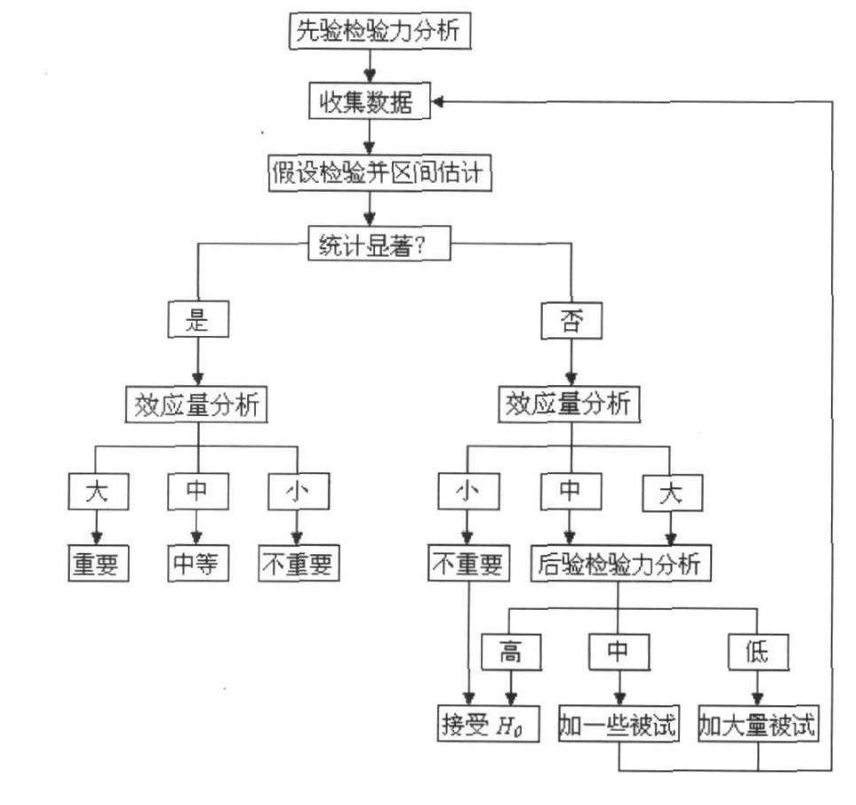

检验力分析是研究设计和数据分析中的一个重要步骤，旨在确定一个统计检验在实际效应存在时正确拒绝零假设的概率。高检验力意味着在效应存在时，我们有较高的概率检测到这个效应，从而得出正确的结论。以下是如何进行检验力分析的步骤和方法：

### 步骤一：确定分析的基本要素

1. **效应量（Effect Size）**：
   - 效应量衡量自变量对因变量的影响大小。常用的效应量指标包括 Cohen's d、Pearson's r、$ f^2 $ 等。
   - 如果没有已知的效应量，可以根据文献或先前研究估计效应量。

2. **显著性水平（Alpha Level, $\alpha$）**：
   - 通常设定为 0.05 或 0.01，表示拒绝零假设的临界值。

3. **样本量（Sample Size）**：
   - 样本量直接影响检验力。较大的样本量通常会提高检验力。

4. **检验类型（Type of Test）**：
   - 例如：单尾检验或双尾检验。双尾检验需要检测效应的两个方向，因此检验力通常低于单尾检验。

### 步骤二：选择适当的工具或软件

检验力分析可以通过多种统计软件和工具来完成。常用的工具包括：

1. **G*Power**：一个免费且功能强大的检验力分析工具，适用于多种统计检验。
2. **R 包**：如 pwr 包，可以在 R 环境中进行检验力分析。
3. **SPSS**：提供检验力分析模块。
4. **其他统计软件**：如 SAS、STATA 也提供检验力分析功能。

### 步骤三：执行检验力分析

以下是使用 G*Power 和 R 进行检验力分析的示例。

#### 示例一：使用 G*Power 进行检验力分析

假设我们要进行一个两独立样本 t 检验，目的是比较两组人群的平均健康指数。

1. **打开 G*Power**：
   - 选择“Test family”为“t tests”。
   - 选择“Statistical test”为“Means: Difference between two independent means (two groups)”。

2. **设置参数**：
   - **Tail(s)**：选择“Two”。
   - **Effect size d**：输入预期的效应量（例如，0.5）。
   - **α err prob**：输入显著性水平（例如，0.05）。
   - **Power (1-β err prob)**：输入期望的检验力（例如，0.80）。
   - **Allocation ratio N2/N1**：输入组间的样本比例（通常为1:1）。

3. **运行分析**：
   - 点击“Calculate”按钮，G*Power 会输出所需的样本量。

### 步骤四：解释和应用结果

1. **确定样本量**：
   - 检验力分析将输出所需的样本量，以便在实际效应存在时具有足够的检验力来拒绝零假设。
   - 如果样本量不足，可以考虑增加样本量或调整研究设计。

2. **实际应用**：
   - 在研究设计阶段，根据检验力分析结果调整样本量，确保研究具有足够的检验力。
   - 在数据分析阶段，使用检验力结果解释统计检验的结果和结论。

### 总结

检验力分析是确保研究设计合理性和结果可靠性的关键步骤。通过选择适当的工具和方法，研究者可以估计所需样本量，调整研究设计，提高检验力，从而在实际效应存在时更有可能正确拒绝零假设。

#### 效应量（Effect size）

明白了，让我们重新整理并用更通俗的语言解释不同情况下的效应量，确保使用场景清晰明了且易于理解。

### 效应量分析分类表

| 自变量类型 | 因变量类型 | 常用效应量 | 使用场景 | 公式 |
|-------------|-------------|-------------|----------|------|
| 类别        | 类别        | Cramér's V  | 比较两个类别变量之间的关系，如性别和是否吸烟 | $ V = \sqrt{\frac{\chi^2}{n(k-1)}} $ |
|             |             | Phi Coefficient (φ) | 比较两个二分类变量之间的关系，如性别和是否通过考试 | $ \phi = \sqrt{\frac{\chi^2}{n}} $ |
| 类别        | 连续        | Cohen's d   | 比较两组的平均数差异，如男生和女生的平均身高差 | $ d = \frac{\bar{X}_1 - \bar{X}_2}{s_p} $ |
|             |             | Glass's Δ   | 当对照组的标准差不同于实验组时，比较两组的平均数差异，如新药组和安慰剂组的效果差 | $ \Delta = \frac{\bar{X}_1 - \bar{X}_2}{s_{control}} $ |
|             |             | Hedges' g   | 对于样本量较小（如小于 20）的研究，比较两组的平均数差异 | $ g = d \times \left( 1 - \frac{3}{4(n_1 + n_2) - 9} \right) $ |
|             |             | η² (Eta Squared) | 比较多组的差异，如不同教学方法对考试成绩的影响 | $ \eta^2 = \frac{SS_{effect}}{SS_{total}} $ |
|             |             | ω² (Omega Squared) | 在小样本研究中，比 η² 更稳健的效应量，如不同教学方法对考试成绩的影响 | $ \omega^2 = \frac{SS_{effect} - (df_{effect} \times MS_{error})}{SS_{total} + MS_{error}} $ |
| 连续        | 类别        | Logistic Regression Coefficient | 衡量一个连续变量对二分类结果的影响，如收入对是否购买保险的影响 | 逻辑回归模型中的回归系数 |
| 连续        | 连续        | Pearson's r | 比较两个连续变量的线性关系，如身高和体重之间的关系 | $ r = \frac{\sum (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum (X_i - \bar{X})^2 \sum (Y_i - \bar{Y})^2}} $ |
|             |             | R² (判定系数) | 测量一个回归模型中自变量对因变量解释的比例，如学习时间对考试成绩的解释 | $ R^2 = \frac{SS_{regression}}{SS_{total}} $ |
|             |             | f² (Cohen's f²) | 在回归模型中，评估某个特定自变量的效应大小，如学习时间对考试成绩的影响 | $ f^2 = \frac{R^2_{included} - R^2_{excluded}}{1 - R^2_{included}} $ |

#### 解释力（Explained variance）


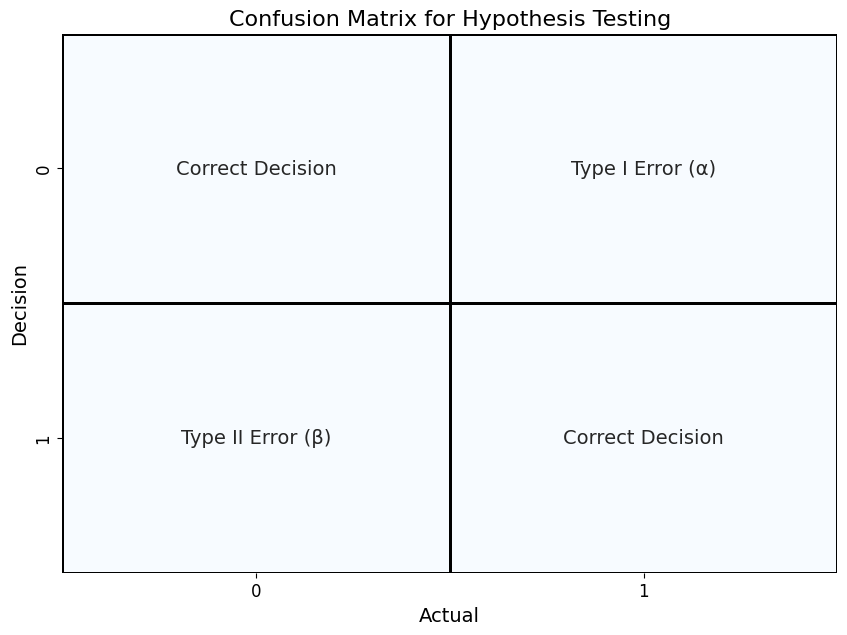

In [5]:
# Define the confusion matrix for hypothesis testing
confusion_matrix = np.array([
    ['Correct Decision', 'Type I Error (α)'],
    ['Type II Error (β)', 'Correct Decision']
])

# Create a DataFrame for better plotting
confusion_df = pd.DataFrame(confusion_matrix, columns=['Actual H0 True', 'Actual H1 True'], index=['Reject H0', 'Accept H0'])

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(np.zeros_like(confusion_df, dtype=float), annot=confusion_df, fmt='', cmap='Blues', cbar=False, linewidths=1, linecolor='black', annot_kws={"size": 14})

plt.title('Confusion Matrix for Hypothesis Testing', fontsize=16)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Decision', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()



### 详细解释

#### α 错误的发生原因

1. **样本变异性**：即使原假设为真，样本数据可能会因为随机变异导致我们观察到显著结果。
2. **显著性水平设定**：α 错误的概率由我们设定的显著性水平决定。较低的 α 意味着我们更严格地判断显著性，减少 α 错误的概率，但可能增加 β 错误的概率。

#### β 错误的发生原因

1. **样本量不足**：较小的样本量可能导致检验的统计功效不足，无法检测到实际存在的效应。
2. **影响效应小**：如果实际效应较小，可能难以区分原假设和备择假设，增加 β 错误的概率。
3. **显著性水平设定**：较高的显著性水平（较低的 α）意味着我们更宽松地判断显著性，减少 β 错误的概率，但可能增加 α 错误的概率。


---

好的，让我们以 t 检验为例，进行一次关于感知价值对购买意愿影响的消费者研究假设检验。我们使用李克特5度量表，每个维度有3个题项进行测量。以下是每个步骤的详细过程和计算。

### 步骤 1：数据收集
我们假设收集了以下数据：

| 受访者 | 感知价值题项1 | 感知价值题项2 | 感知价值题项3 | 购买意愿题项1 | 购买意愿题项2 | 购买意愿题项3 |
|--------|----------------|----------------|----------------|---------------|---------------|---------------|
| 1      | 4              | 5              | 4              | 3             | 4             | 3             |
| 2      | 3              | 4              | 3              | 2             | 3             | 2             |
| 3      | 5              | 5              | 5              | 4             | 5             | 4             |
| 4      | 4              | 4              | 4              | 3             | 4             | 3             |
| 5      | 2              | 3              | 2              | 1             | 2             | 1             |

### 步骤 2：计算每个维度的平均得分
对于每个受访者，计算感知价值和购买意愿的平均得分。

感知价值的平均得分计算公式：
$$
\text{感知价值平均得分} = \frac{\text{题项1得分} + \text{题项2得分} + \text{题项3得分}}{3}
$$

购买意愿的平均得分计算公式：
$$
\text{购买意愿平均得分} = \frac{\text{题项1得分} + \text{题项2得分} + \text{题项3得分}}{3}
$$

| 受访者 | 感知价值平均得分 | 购买意愿平均得分 |
|--------|------------------|------------------|
| 1      | (4+5+4)/3 = 4.33 | (3+4+3)/3 = 3.33 |
| 2      | (3+4+3)/3 = 3.33 | (2+3+2)/3 = 2.33 |
| 3      | (5+5+5)/3 = 5.00 | (4+5+4)/3 = 4.33 |
| 4      | (4+4+4)/3 = 4.00 | (3+4+3)/3 = 3.33 |
| 5      | (2+3+2)/3 = 2.33 | (1+2+1)/3 = 1.33 |

### 步骤 3：提出假设
- **原假设 $H_0$**：感知价值对购买意愿没有积极的影响（即，两者之间的相关性为零）。
- **备择假设 $H_1$**：感知价值对购买意愿有积极的影响（即，两者之间存在正相关）。

### 步骤 4：计算 t 统计量
我们使用配对样本 t 检验来比较感知价值和购买意愿的平均得分。

配对样本 t 检验的 t 统计量计算公式：
$$
t = \frac{\bar{d}}{s_d / \sqrt{n}}
$$

其中，$\bar{d}$ 是样本差值的平均值，$s_d$ 是样本差值的标准差，$n$ 是样本大小。

计算差值 $d$：
$$
d_i = \text{感知价值平均得分}_i - \text{购买意愿平均得分}_i
$$

计算每个受访者的差值：
| 受访者 | 感知价值平均得分 | 购买意愿平均得分 | 差值 $d$ |
|--------|------------------|------------------|------------|
| 1      | 4.33             | 3.33             | 1.00       |
| 2      | 3.33             | 2.33             | 1.00       |
| 3      | 5.00             | 4.33             | 0.67       |
| 4      | 4.00             | 3.33             | 0.67       |
| 5      | 2.33             | 1.33             | 1.00       |

计算差值的平均值 $\bar{d}$：
$$
\bar{d} = \frac{\sum_{i=1}^{n} d_i}{n} = \frac{1.00 + 1.00 + 0.67 + 0.67 + 1.00}{5} = 0.87
$$

计算差值的标准差 $s_d$：
$$
s_d = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (d_i - \bar{d})^2} = \sqrt{\frac{1}{4} ((1.00-0.87)^2 + (1.00-0.87)^2 + (0.67-0.87)^2 + (0.67-0.87)^2 + (1.00-0.87)^2)} = 0.16
$$

计算 t 统计量：
$$
t = \frac{0.87}{0.16 / \sqrt{5}} = \frac{0.87}{0.0715} = 12.16
$$

### 步骤 5：确定临界值和做出决策
对于显著性水平 $\alpha = 0.05$ 和自由度 $df = n-1 = 4$，查找 t 分布表，我们得到临界值 $t_{crit} = 2.776$。

由于计算得出的 t 值 $12.16$ 大于临界值 $2.776$，我们拒绝原假设 $H_0$，并接受备择假设 $H_1$。

### 结论
我们有足够的证据表明感知价值对购买意愿有积极的影响。

f:\AI\Python\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
f:\AI\Python\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
f:\AI\Python\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24471 (\N{CJK UNIFIED IDEOGRAPH-5F97}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
f:\AI\Python\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


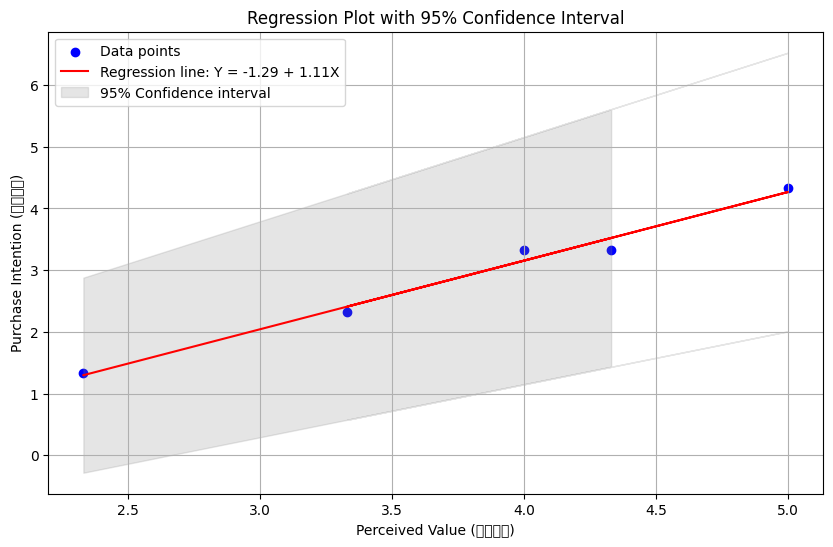

f:\AI\Python\.venv\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     194.8
Date:                Mon, 17 Jun 2024   Prob (F-statistic):           0.000796
Time:                        15:01:31   Log-Likelihood:                 3.2790
No. Observations:                   5   AIC:                            -2.558
Df Residuals:                       3   BIC:                            -3.339
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2928      0.311     -4.155      0.025      -2.283      -0.303
x1             1.1118      0.080     13.958      0.001       0.858       1.365
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.837
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.286
Skew:                          -0.186   Prob(JB):                        0.867
Kurtosis:                       1.889   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

# Data for perceived value and purchase intention
perceived_value = np.array([4.33, 3.33, 5.00, 4.00, 2.33])
purchase_intention = np.array([3.33, 2.33, 4.33, 3.33, 1.33])

# Perform linear regression
X = sm.add_constant(perceived_value)  # Add a constant term for the intercept
model = sm.OLS(purchase_intention, X).fit()

# Get the regression parameters
intercept, slope = model.params

# Calculate the predicted values
predicted_values = model.predict(X)

# Get the confidence intervals
conf_int = model.conf_int(alpha=0.05)
lower_conf_int = conf_int[0, 1] + conf_int[1, 1] * perceived_value
upper_conf_int = conf_int[0, 0] + conf_int[1, 0] * perceived_value

# Plotting the data, regression line, and confidence intervals
plt.figure(figsize=(10, 6))
plt.scatter(perceived_value, purchase_intention, color='blue', label='Data points')
plt.plot(perceived_value, predicted_values, color='red', label=f'Regression line: Y = {intercept:.2f} + {slope:.2f}X')
plt.fill_between(perceived_value, lower_conf_int, upper_conf_int, color='gray', alpha=0.2, label='95% Confidence interval')
plt.xlabel('Perceived Value (平均得分)')
plt.ylabel('Purchase Intention (平均得分)')
plt.title('Regression Plot with 95% Confidence Interval')
plt.legend()
plt.grid(True)
plt.show()

# Display regression results summary
model.summary()


当然，以下是对回归分析结果的通俗解释：

### 回归方程
- **回归方程**：$ Y = -1.29 + 1.11X $
  - 这个方程表示感知价值（X）对购买意愿（Y）的影响。

### 置信区间
- **95%置信区间**：表示我们有95%的信心相信，当感知价值增加1个单位时，购买意愿会增加1.11个单位。具体来说，我们有95%的信心，感知价值对购买意愿的影响范围在0.86到1.37之间。
  - $\text{置信区间} = [0.86, 1.37]$

### 详细解释
1. **回归系数（1.11）**：
   - 当感知价值增加1个单位时，购买意愿平均增加1.11个单位。
   - 这意味着，假如一个产品的感知价值从4提高到5，那么购买意愿会平均增加1.11个单位。

2. **置信区间**：
   - 置信区间为0.86到1.37，表示我们有95%的信心，真实的影响范围在这个区间内。
   - 这意味着，感知价值增加1个单位，购买意愿增加的幅度在0.86到1.37之间。

3. **标准误差（0.08）**：
   - 标准误差表示回归系数估计值的精确程度，标准误差越小，估计值越精确。
   - 在本例中，标准误差为0.08，说明感知价值对购买意愿影响的估计值（1.11）有较高的精确性。

4. **p值（0.001）**：
   - p值表示检验结果的显著性，p值越小，说明结果越显著。
   - 在本例中，p值为0.001，远小于常用的显著性水平0.05，表示感知价值对购买意愿的影响是显著的。

5. **截距项（-1.29）**：
   - 截距项表示当感知价值为0时，购买意愿的预期值。
   - 虽然在实际情况中感知价值不太可能为0，这个值主要用于计算回归方程中的常数部分。

### 综上所述
我们有95%的信心相信，当感知价值增加1个单位时，购买意愿会增加1.11个单位，且这个增加值在0.86到1.37之间。感知价值对购买意愿的影响显著（p值为0.001），标准误差较小（0.08），表示我们的估计值精确。截距项为-1.29，表示当感知价值为0时，购买意愿的预期值为-1.29。

让我们仔细解读回归分析结果中的其他值得注意的部分。

### 1. R-squared 和 Adj. R-squared
- **R-squared (R²)**: 0.985
  - 这个值表示回归模型解释了感知价值对购买意愿变化的98.5%。R² 值越接近1，模型的解释力越强。
- **Adj. R-squared (调整后的R²)**: 0.980
  - 调整后的R²考虑了自变量数量对模型解释力的影响，避免了自变量过多导致的过拟合。调整后的R²值为0.980，表示模型仍然具有很强的解释力。

### 2. F-statistic 和 Prob(F-statistic)
- **F-statistic (F统计量)**: 194.8
  - F统计量用于检验整个回归模型的显著性。高F统计量表示回归模型显著。
- **Prob(F-statistic) (F统计量的概率值)**: 0.000796
  - 这个值表示回归模型显著的概率。非常小的p值（<0.05）表明模型整体显著，拒绝原假设（所有回归系数均为零）。

### 3. Log-Likelihood (对数似然)
- **Log-Likelihood**: 3.2790
  - 对数似然值用于模型比较，值越大表示模型拟合数据越好。

### 4. AIC 和 BIC
- **AIC (Akaike信息准则)**: -2.558
  - AIC用于模型比较，值越小表示模型越好。AIC考虑了模型的复杂度和拟合度。
- **BIC (贝叶斯信息准则)**: -3.339
  - BIC类似于AIC，但对复杂模型有更强的惩罚。值越小表示模型越好。

### 5. 其他统计量
- **Durbin-Watson (杜宾-沃森统计量)**: 0.837
  - 杜宾-沃森统计量用于检验残差的自相关性。值接近2表示残差无自相关性。0.837表示存在一定的正自相关性。
- **Jarque-Bera (JB) 测试**: 0.286
  - 用于检验残差是否服从正态分布。较高的p值（0.867）表示残差服从正态分布的假设不能被拒绝。
- **Skew (偏度)**: -0.186
  - 用于测量数据对称性。接近0表示数据对称。
- **Kurtosis (峰度)**: 1.889
  - 用于测量数据分布的尖峰程度。正态分布的峰度为3，小于3表示数据分布较平坦。

### 总结
该回归模型非常显著，能够解释感知价值对购买意愿的大部分变化。R²和调整后的R²值都接近1，表示模型的解释力很强。F统计量和其p值也表明模型整体显著。Durbin-Watson统计量提示存在一定的正自相关性，Jarque-Bera测试显示残差基本服从正态分布。综合这些信息，模型在统计上是可信且显著的。

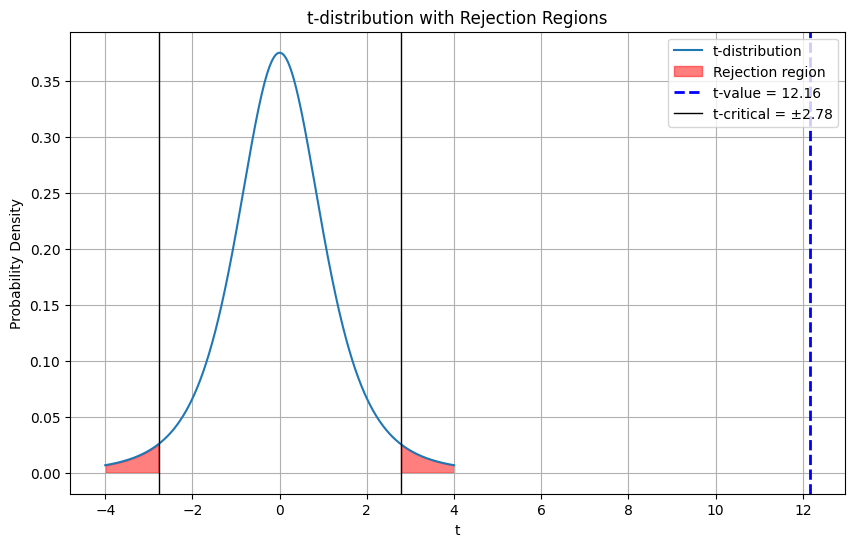

In [7]:
# Plotting the hypothesis testing with t-value and rejection region
from scipy.stats import t

# Parameters
alpha = 0.05
df = len(perceived_value) - 1
t_critical = t.ppf(1 - alpha/2, df)

# Plotting the t-distribution
x = np.linspace(-4, 4, 1000)
y = t.pdf(x, df)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='t-distribution')

# Rejection regions
plt.fill_between(x, 0, y, where=(x > t_critical), color='red', alpha=0.5, label='Rejection region')
plt.fill_between(x, 0, y, where=(x < -t_critical), color='red', alpha=0.5)

# t-value
t_value = (0.87 - 0) / (0.16 / np.sqrt(len(perceived_value)))
plt.axvline(t_value, color='blue', linestyle='--', linewidth=2, label=f't-value = {t_value:.2f}')

# Critical values
plt.axvline(t_critical, color='black', linestyle='-', linewidth=1, label=f't-critical = ±{t_critical:.2f}')
plt.axvline(-t_critical, color='black', linestyle='-', linewidth=1)

plt.title('t-distribution with Rejection Regions')
plt.xlabel('t')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


t值对应于学生t分布（Student's t-distribution），这是在样本量较小（通常n < 30）且总体标准差未知的情况下使用的一种分布。t值表示标准化的样本均值与总体均值之间的差异，并考虑了样本变异性和样本大小。

为了帮助理解，让我们查看一个典型的t分布表，显示不同自由度下的临界t值（critical t-values）。

### t分布临界值表
这是一个简化的t分布表，显示不同自由度（df）和显著性水平（α）下的临界t值。我们主要关注α = 0.05和α = 0.01的双侧检验（two-tailed test）。

| df  | α = 0.10 (双侧) | α = 0.05 (双侧) | α = 0.01 (双侧) |
|-----|-----------------|-----------------|-----------------|
| 1   | 6.314           | 12.706          | 63.657          |
| 2   | 2.920           | 4.303           | 9.925           |
| 3   | 2.353           | 3.182           | 5.841           |
| 4   | 2.132           | 2.776           | 4.604           |
| 5   | 2.015           | 2.571           | 4.032           |
| 6   | 1.943           | 2.447           | 3.707           |
| 7   | 1.895           | 2.365           | 3.499           |
| 8   | 1.860           | 2.306           | 3.355           |
| 9   | 1.833           | 2.262           | 3.250           |
| 10  | 1.812           | 2.228           | 3.169           |
| 11  | 1.796           | 2.201           | 3.106           |
| 12  | 1.782           | 2.179           | 3.055           |
| 13  | 1.771           | 2.160           | 3.012           |
| 14  | 1.761           | 2.145           | 2.977           |
| 15  | 1.753           | 2.131           | 2.947           |
| 16  | 1.746           | 2.120           | 2.921           |
| 17  | 1.740           | 2.110           | 2.898           |
| 18  | 1.734           | 2.101           | 2.878           |
| 19  | 1.729           | 2.093           | 2.861           |
| 20  | 1.725           | 2.086           | 2.845           |
| ... | ...             | ...             | ...             |
| ∞   | 1.645           | 1.960           | 2.576           |

### 应用在我们的例子中

我们在前面的例子中计算的t值为12.16，自由度为 \( n - 1 = 5 - 1 = 4 \)。我们设定的显著性水平为α = 0.05，双侧检验。查找t分布表中，df = 4和α = 0.05对应的临界t值为±2.776。

- **计算的t值 (12.16)**：远大于临界t值 (2.776)，这表明样本均值与假设的总体均值之间有显著差异。因此，我们拒绝原假设，认为感知价值对购买意愿有显著的积极影响。

### 解释t值和临界值的关系
- **t值**：表示标准化的样本均值与总体均值之间的差异。
- **临界t值**：表示在设定的显著性水平下，样本均值与总体均值之间差异的边界。如果计算的t值超过临界t值，表示差异显著，拒绝原假设。

通过查看t分布表和t值，我们可以更直观地理解t值落入拒绝域的意义。这说明样本均值与总体均值之间的差异不太可能是由于随机变异引起的，而是有实际意义的差异。

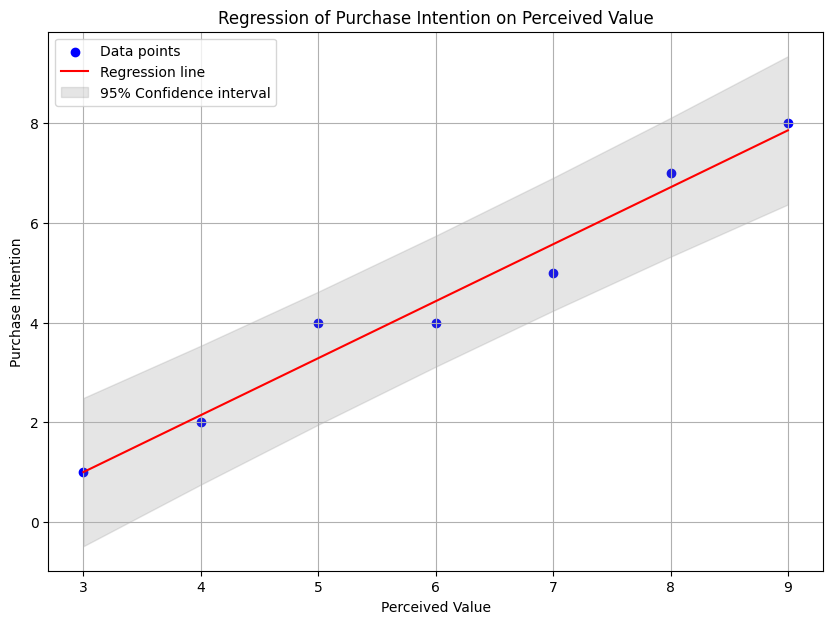

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Example data
data = {
    'Perceived_Value': [3, 4, 5, 6, 7, 8, 9],
    'Purchase_Intention': [1, 2, 4, 4, 5, 7, 8]
}
df = pd.DataFrame(data)

# Fit the regression model
model = smf.ols('Purchase_Intention ~ Perceived_Value', data=df).fit()

# Create prediction summary frame
pred_summary_frame = model.get_prediction(df).summary_frame()

# Sort values for plotting
sorted_index = np.argsort(df['Perceived_Value'])
sorted_perceived_value = df['Perceived_Value'].iloc[sorted_index]
sorted_fittedvalues = model.fittedvalues.iloc[sorted_index]
sorted_ci_lower = pred_summary_frame['obs_ci_lower'].iloc[sorted_index]
sorted_ci_upper = pred_summary_frame['obs_ci_upper'].iloc[sorted_index]

# Plot the regression line and confidence intervals
plt.figure(figsize=(10, 7))
plt.scatter(sorted_perceived_value, df['Purchase_Intention'].iloc[sorted_index], color='blue', label='Data points')
plt.plot(sorted_perceived_value, sorted_fittedvalues, color='red', label='Regression line')

# Plotting the confidence interval
plt.fill_between(sorted_perceived_value, sorted_ci_lower, sorted_ci_upper,
                 color='gray', alpha=0.2, label='95% Confidence interval')

plt.title('Regression of Purchase Intention on Perceived Value')
plt.xlabel('Perceived Value')
plt.ylabel('Purchase Intention')
plt.legend()
plt.grid(True)
plt.show()
